In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
# from google.colab import drive
download = drive.CreateFile({'id': '1702ZE3GBXS6CMULT9HUBna1p0UlegPKv'})
download.GetContentFile('Train.zip')
!unzip Train.zip

Archive:  Train.zip
replace Images/test/49000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
train = pd.read_csv('train.csv')
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/train/'+train['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/49000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 49000/49000 [00:15<00:00, 3103.25it/s]


In [ ]:
# # We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
# train_image = []
# for i in tqdm(range(1)):
#     img = image.load_img('Images/train/'+train['filename'][i], target_size=(28,28,1), grayscale=True)
#     print('first',img)
#     img = image.img_to_array(img)
#     print('second',img)
#     img = img/255
#     print('third',img)
#     train_image.append(img)
#     print('last',train_image)
# X = np.array(train_image)

In [ ]:
y=train['label'].values
y = to_categorical(y)
y.shape

(49000, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
# Define the model structure
model = Sequential()
model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
# model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3,3), activation='relu'))
# # model.add(BatchNormalization())
# model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Train on 39200 samples, validate on 9800 samples
Epoch 1/20
39200/39200 [==============================] - 18s 468us/step - loss: 0.5365 - accuracy: 0.8290 - val_loss: 0.1360 - val_accuracy: 0.9580
Epoch 2/20
39200/39200 [==============================] - 18s 463us/step - loss: 0.1959 - accuracy: 0.9423 - val_loss: 0.0923 - val_accuracy: 0.9716
Epoch 3/20
39200/39200 [==============================] - 18s 460us/step - loss: 0.1443 - accuracy: 0.9599 - val_loss: 0.0732 - val_accuracy: 0.9773
Epoch 4/20
39200/39200 [==============================] - 18s 471us/step - loss: 0.1164 - accuracy: 0.9670 - val_loss: 0.0673 - val_accuracy: 0.9783
Epoch 5/20
39200/39200 [==============================] - 18s 457us/step - loss: 0.1008 - accuracy: 0.9707 - val_loss: 0.0606 - val_accuracy: 0.9824
Epoch 6/20
39200/39200 [==============================] - 18s 457us/step - loss: 0.0840 - accuracy: 0.9755 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 7/20
39200/39200 [==============================] -

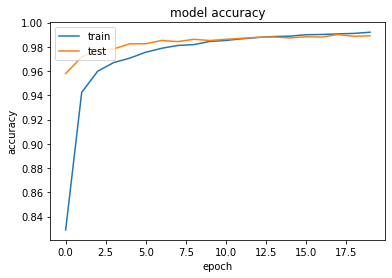

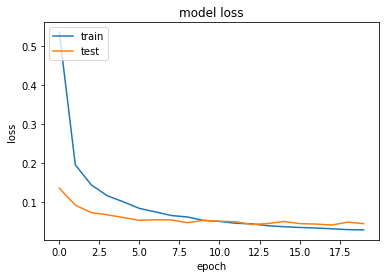

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
link = '1MwBYYAwwq7-wMyLw5EM1Dk8C6wZii_Hh'
download = drive.CreateFile({'id': link})
download.GetContentFile('Test_fCbTej3.csv')
test_file = pd.read_csv('Test_fCbTej3.csv')
test_file.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [ ]:
test_image = []
for i in tqdm(range(test_file.shape[0])):
    img = image.load_img('Images/test/'+test_file['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/21000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 21000/21000 [00:06<00:00, 3010.24it/s]


In [ ]:
prediction = model.predict_classes(test)


In [ ]:
download = drive.CreateFile({'id': '15c0OGX_t3Pv2ikPjEr2M9q-oaAaS701G'})
download.GetContentFile('Sample_Submission_lxuyBuB.csv')

In [ ]:
sample = pd.read_csv('Sample_Submission_lxuyBuB.csv')
sample['filename'] = test_file['filename']
sample['label'] = prediction
sample.to_csv('a.csv', header=True, index=False)

In [ ]:
from google.colab import files
files.download("a.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Analytics vidhya Idetify the digits hackathon - My rank is 62 in public leaderboard